In [67]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from IPython.display import Image

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
# Функция для загрузки днных. Ячейку просто прогрузить
def load_dataset():
    train_dataset = h5py.File("train_catvnoncat.h5", "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File("test_catvnoncat.h5", "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [37]:
# Тестирующие функции. Ячейку просто прогрузить
def sigmoid_test(target):
    x = np.array([0, 2])
    output = target(x)
    assert type(output) == np.ndarray, "Wrong type. Expected np.ndarray"
    assert np.allclose(output, [0.5, 0.88079708]), f"Wrong value. {output} != [0.5, 0.88079708]"
    output = target(1)
    assert np.allclose(output, 0.7310585), f"Wrong value. {output} != 0.7310585"
    print('\033[92mAll tests passed!')


def initialize_with_zeros_test_1(target):
    dim = 3
    w, b = target(dim)
    assert type(b) == float, f"Wrong type for b. {type(b)} != float"
    assert b == 0., "b must be 0.0"
    assert type(w) == np.ndarray, f"Wrong type for w. {type(w)} != np.ndarray"
    assert w.shape == (dim, 1), f"Wrong shape for w. {w.shape} != {(dim, 1)}"
    assert np.allclose(w, [[0.], [0.], [0.]]), f"Wrong values for w. {w} != {[[0.], [0.], [0.]]}"
    print('\033[92mFirst test passed!')


def initialize_with_zeros_test_2(target):
    dim = 4
    w, b = target(dim)
    assert type(b) == float, f"Wrong type for b. {type(b)} != float"
    assert b == 0., "b must be 0.0"
    assert type(w) == np.ndarray, f"Wrong type for w. {type(w)} != np.ndarray"
    assert w.shape == (dim, 1), f"Wrong shape for w. {w.shape} != {(dim, 1)}"
    assert np.allclose(w, [[0.], [0.], [0.], [0.]]), f"Wrong values for w. {w} != {[[0.], [0.], [0.], [0.]]}"
    print('\033[92mSecond test passed!')    


def propagate_test(target):
    w, b = np.array([[1.], [2.], [-1]]), 2.5, 
    X = np.array([[1., 2., -1., 0], [3., 4., -3.2, 1], [3., 4., -3.2, -3.5]])
    Y = np.array([[1, 1, 0, 0]])

    expected_dw = np.array([[-0.03909333], [ 0.12501464], [-0.99960809]])
    expected_db = np.float64(0.288106326429569)
    expected_grads = {'dw': expected_dw,
                      'db': expected_db}
    expected_cost = np.array(2.0424567983978403)
    expected_output = (expected_grads, expected_cost)

    grads, cost = target( w, b, X, Y)

    assert type(grads['dw']) == np.ndarray, f"Wrong type for grads['dw']. {type(grads['dw'])} != np.ndarray"
    assert grads['dw'].shape == w.shape, f"Wrong shape for grads['dw']. {grads['dw'].shape} != {w.shape}"
    assert np.allclose(grads['dw'], expected_dw), f"Wrong values for grads['dw']. {grads['dw']} != {expected_dw}"
    assert np.allclose(grads['db'], expected_db), f"Wrong values for grads['db']. {grads['db']} != {expected_db}"
    assert np.allclose(cost, expected_cost), f"Wrong values for cost. {cost} != {expected_cost}"
    print('\033[92mAll tests passed!')


def optimize_test(target):
    w, b, X, Y = np.array([[1.], [2.]]), 2., np.array([[1., 2., -1.], [3., 4., -3.2]]), np.array([[1, 0, 1]])
    expected_w = np.array([[-0.70916784], [-0.42390859]])
    expected_b = np.float64(2.26891346)
    expected_params = {"w": expected_w,
                       "b": expected_b}
   
    expected_dw = np.array([[0.06188603], [-0.01407361]])
    expected_db = np.float64(-0.04709353)
    expected_grads = {"dw": expected_dw,
                      "db": expected_db}
    
    expected_cost = [5.80154532, 0.31057104]
    expected_output = (expected_params, expected_grads, expected_cost)
    
    params, grads, costs = target(w, b, X, Y, num_iterations=101, learning_rate=0.1, print_cost=False)
    
    assert type(costs) == list, "Wrong type for costs. It must be a list"
    assert len(costs) == 2, f"Wrong length for costs. {len(costs)} != 2"
    assert np.allclose(costs, expected_cost), f"Wrong values for costs. {costs} != {expected_cost}"
    
    assert type(grads['dw']) == np.ndarray, f"Wrong type for grads['dw']. {type(grads['dw'])} != np.ndarray"
    assert grads['dw'].shape == w.shape, f"Wrong shape for grads['dw']. {grads['dw'].shape} != {w.shape}"
    assert np.allclose(grads['dw'], expected_dw), f"Wrong values for grads['dw']. {grads['dw']} != {expected_dw}"
    
    assert np.allclose(grads['db'], expected_db), f"Wrong values for grads['db']. {grads['db']} != {expected_db}"
    
    assert type(params['w']) == np.ndarray, f"Wrong type for params['w']. {type(params['w'])} != np.ndarray"
    assert params['w'].shape == w.shape, f"Wrong shape for params['w']. {params['w'].shape} != {w.shape}"
    assert np.allclose(params['w'], expected_w), f"Wrong values for params['w']. {params['w']} != {expected_w}"
    
    assert np.allclose(params['b'], expected_b), f"Wrong values for params['b']. {params['b']} != {expected_b}"
    
    print('\033[92mAll tests passed!')   


def predict_test(target):
    w = np.array([[0.3], [0.5], [-0.2]])
    b = -0.33333
    X = np.array([[1., -0.3, 1.5],[2, 0, 1], [0, -1.5, 2]])
    
    pred = target(w, b, X)
    
    assert type(pred) == np.ndarray, f"Wrong type for pred. {type(pred)} != np.ndarray"
    assert pred.shape == (1, X.shape[1]), f"Wrong shape for pred. {pred.shape} != {(1, X.shape[1])}"
    assert np.bitwise_not(np.allclose(pred, [[1., 1., 1]])), f"Perhaps you forget to add b in the calculation of A"
    assert np.allclose(pred, [[1., 0., 1]]), f"Wrong values for pred. {pred} != {[[1., 0., 1.]]}"
    
    print('\033[92mAll tests passed!')


def model_test(target):
    np.random.seed(0)

    expected_output = {'costs': [np.array(0.69314718)], 
                   'Y_prediction_test': np.array([[1., 1., 0.]]), 
                   'Y_prediction_train': np.array([[1., 1., 0., 1., 0., 0., 1.]]), 
                   'w': np.array([[ 0.08639757],
                           [-0.08231268],
                           [-0.11798927],
                           [ 0.12866053]]), 
                   'b': -0.03983236094816321}
    
    # Use 3 samples for training
    b, Y, X = 1.5, np.array([1, 0, 0, 1, 0, 0, 1]).reshape(1, 7), np.random.randn(4, 7),

    # Use 6 samples for testing
    x_test = np.random.randn(4, 3)
    y_test = np.array([0, 1, 0])

    d = target(X, Y, x_test, y_test, num_iterations=50, learning_rate=0.01)
    
    assert type(d['costs']) == list, f"Wrong type for d['costs']. {type(d['costs'])} != list"
    assert len(d['costs']) == 1, f"Wrong length for d['costs']. {len(d['costs'])} != 1"
    assert np.allclose(d['costs'], expected_output['costs']), f"Wrong values for d['costs']. {d['costs']} != {expected_output['costs']}"
    
    assert type(d['w']) == np.ndarray, f"Wrong type for d['w']. {type(d['w'])} != np.ndarray"
    assert d['w'].shape == (X.shape[0], 1), f"Wrong shape for d['w']. {d['w'].shape} != {(X.shape[0], 1)}"
    assert np.allclose(d['w'], expected_output['w']), f"Wrong values for d['w']. {d['w']} != {expected_output['w']}"
    
    assert np.allclose(d['b'], expected_output['b']), f"Wrong values for d['b']. {d['b']} != {expected_output['b']}"
    
    assert type(d['Y_prediction_test']) == np.ndarray, f"Wrong type for d['Y_prediction_test']. {type(d['Y_prediction_test'])} != np.ndarray"
    assert d['Y_prediction_test'].shape == (1, x_test.shape[1]), f"Wrong shape for d['Y_prediction_test']. {d['Y_prediction_test'].shape} != {(1, x_test.shape[1])}"
    assert np.allclose(d['Y_prediction_test'], expected_output['Y_prediction_test']), f"Wrong values for d['Y_prediction_test']. {d['Y_prediction_test']} != {expected_output['Y_prediction_test']}"
    
    assert type(d['Y_prediction_train']) == np.ndarray, f"Wrong type for d['Y_prediction_train']. {type(d['Y_prediction_train'])} != np.ndarray"
    assert d['Y_prediction_train'].shape == (1, X.shape[1]), f"Wrong shape for d['Y_prediction_train']. {d['Y_prediction_train'].shape} != {(1, X.shape[1])}"
    assert np.allclose(d['Y_prediction_train'], expected_output['Y_prediction_train']), f"Wrong values for d['Y_prediction_train']. {d['Y_prediction_train']} != {expected_output['Y_prediction_train']}"
    
    print('\033[92mAll tests passed!')

In [38]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


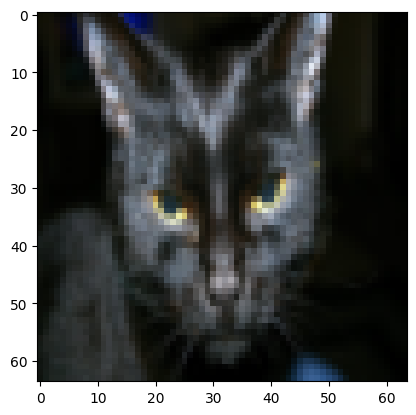

In [39]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

### Exercise 1

- m_train (number of training examples)
- m_test (number of test examples)
- num_px (= height = width of a training image)

In [40]:
#(≈ 3 lines of code)
# m_train = 
# m_test = 
# num_px = 
# YOUR CODE STARTS HERE
m_train = len(train_set_x_orig)
m_test = len(test_set_x_orig)
num_px = len(train_set_x_orig[0])

# YOUR CODE ENDS HERE

print("Number of training examples: m_train = " + str(m_train))
print("Number of testing examples: m_test = " + str(m_test))
print("Height/Width of each image: num_px = " + str(num_px))
print("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print("train_set_x shape: " + str(train_set_x_orig.shape))
print("train_set_y shape: " + str(train_set_y.shape))
print("test_set_x shape: " + str(test_set_x_orig.shape))
print("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


### Exercise 2
Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num\_px $*$ num\_px $*$ 3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use: 
```python
X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X
```

In [41]:
# Reshape the training and test examples
#(≈ 2 lines of code)
# train_set_x_flatten = ...
# test_set_x_flatten = ...
# YOUR CODE STARTS HERE
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# YOUR CODE ENDS HERE

# Check that the first 10 pixels of the second image are in the correct place
assert np.alltrue(train_set_x_flatten[0:10, 1] == [196, 192, 190, 193, 186, 182, 188, 179, 174, 213]), "Wrong solution. Use (X.shape[0], -1).T."
assert np.alltrue(test_set_x_flatten[0:10, 1] == [115, 110, 111, 137, 129, 129, 155, 146, 145, 159]), "Wrong solution. Use (X.shape[0], -1).T."

print("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print("train_set_y shape: " + str(train_set_y.shape))
print("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print("test_set_y shape: " + str(test_set_y.shape))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)


In [42]:
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

<font color='blue'>
    
    
**What you need to remember:**

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
- Reshape the datasets such that each example is now a vector of size (num_px \* num_px \* 3, 1)
- "Standardize" the data

## 3 - General Architecture of the learning algorithm ##

It's time to design a simple algorithm to distinguish cat images from non-cat images.

You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why **Logistic Regression is actually a very simple Neural Network!**

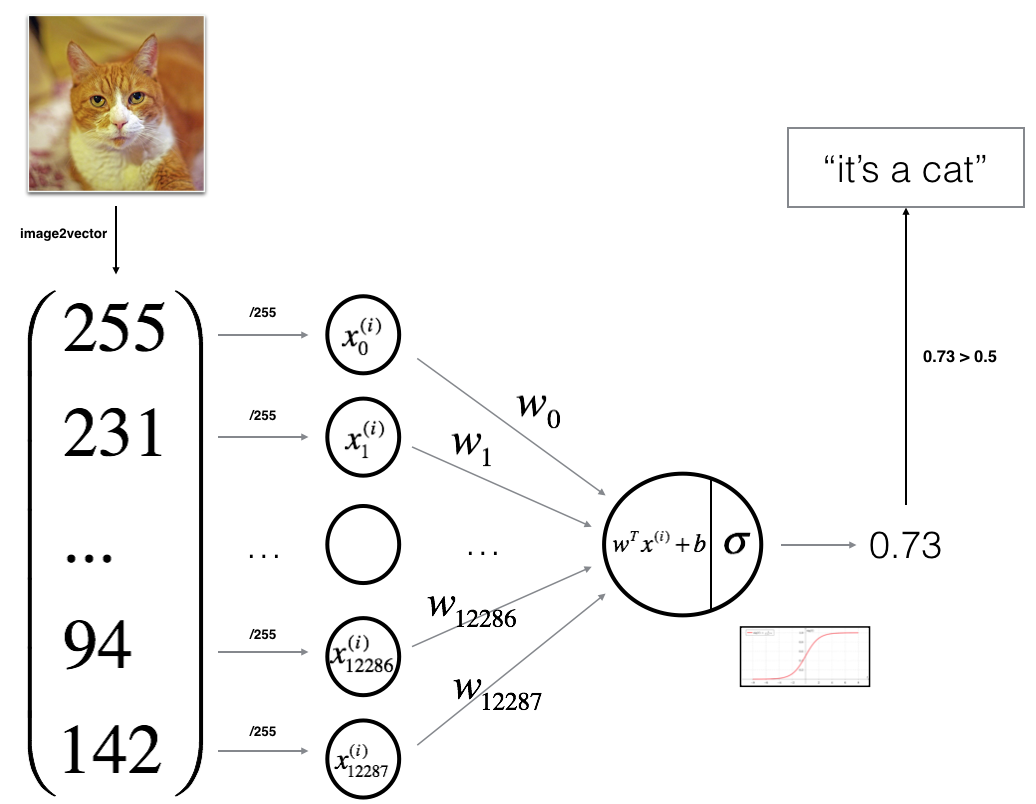

In [43]:
Image("LogReg_kiank.png", width=650, height=400)
#<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{1}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{2}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{3}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{6}$$

**Key steps**:
In this exercise, you will carry out the following steps:
 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

## 4 - Building the parts of our algorithm ## 

The main steps for building a Neural Network are:
1. Define the model structure (such as number of input features) 
2. Initialize the model's parameters
3. Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call `model()`.

### Exercise 3 - sigmoid
As you've seen in the figure above, you need to compute $sigmoid(z) = \frac{1}{1 + e^{-z}}$ for $z = w^T x + b$ to make predictions. Use np.exp().

In [44]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    #(≈ 1 line of code)
    # s = ...
    # YOUR CODE STARTS HERE
    s = 1 / (1 + np.exp(-z))
    # YOUR CODE ENDS HERE
    
    return s

In [45]:
print("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid_test(sigmoid)

sigmoid([0, 2]) = [0.5        0.88079708]
All tests passed!


### Exercise 4 - initialize_with_zeros
Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros.

In [46]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """
    
    # (≈ 2 lines of code)
    # w = ...
    # b = ...
    # YOUR CODE STARTS HERE
    w = np.zeros((dim, 1))
    b = 0.0
    # YOUR CODE ENDS HERE

    return w, b

In [47]:
dim = 2
w, b = initialize_with_zeros(dim)

assert type(b) == float
print ("w = " + str(w))
print ("b = " + str(b))

initialize_with_zeros_test_1(initialize_with_zeros)
initialize_with_zeros_test_2(initialize_with_zeros)

w = [[0.]
 [0.]]
b = 0.0
First test passed!
Second test passed!


Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.


### Exercise 5 - propagate
Implement a function `propagate()` that computes the cost function and its gradient.

**Hints**:

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}(y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)}))$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [48]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    #(≈ 2 lines of code)
    # compute activation
    # A = ...
    # compute cost by using np.dot to perform multiplication. 
    # And don't use loops for the sum.
    # cost = ...                                
    # YOUR CODE STARTS HERE
    A = sigmoid(w.T @ X + b)
    cost = (-1 / m) * (np.dot(Y, np.log(A).T) + np.dot(1 - Y, np.log(1 - A).T))
    # YOUR CODE ENDS HERE

    # BACKWARD PROPAGATION (TO FIND GRAD)
    #(≈ 2 lines of code)
    # dw = ...
    # db = ...
    # YOUR CODE STARTS HERE
    dw = (1 / m) * np.dot(X,(A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    # YOUR CODE ENDS HERE

    cost = np.squeeze(np.array(cost))

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [49]:
w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)

assert type(grads["dw"]) == np.ndarray
assert grads["dw"].shape == (2, 1)
assert type(grads["db"]) == np.float64


print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

propagate_test(propagate)


dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.1250040450043965
cost = 0.15900537707692405
All tests passed!


<a name='ex-6'></a>
### Exercise 6 - optimize
Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [51]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        # (≈ 1 lines of code)
        # Cost and gradient calculation 
        # grads, cost = ...
        # YOUR CODE STARTS HERE
        grads, cost = propagate(w, b, X, Y)
        
        # YOUR CODE ENDS HERE
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        # w = ...
        # b = ...
        # YOUR CODE STARTS HERE
        w -= learning_rate * dw
        b -= learning_rate * db
        # YOUR CODE ENDS HERE
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
            # Print the cost every 100 training iterations
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [52]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

optimize_test(optimize)

w = [[0.80956046]
 [2.0508202 ]]
b = 1.5948713189708588
dw = [[ 0.17860505]
 [-0.04840656]]
db = -0.08888460336847771
Costs = [array(0.15900538)]
All tests passed!


<a name='ex-7'></a>
### Exercise 7 - predict
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the `predict()` function. There are two steps to computing predictions:

1. Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector `Y_prediction`. If you wish, you can use an `if`/`else` statement in a `for` loop (though there is also a way to vectorize this). 

In [54]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    #(≈ 1 line of code)
    # A = ...
    # YOUR CODE STARTS HERE
    A = sigmoid(np.dot(w.T, X) + b)
    
    # YOUR CODE ENDS HERE
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        #(≈ 4 lines of code)
        # if A[0, i] > ____ :
        #     Y_prediction[0,i] = 
        # else:
        #     Y_prediction[0,i] = 
        # YOUR CODE STARTS HERE
        if A[0, i] > 0.5:
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
        # YOUR CODE ENDS HERE
    
    return Y_prediction

In [55]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1.0, -1.1, -3.2], [1.2, 2.0, 0.1]])
print ("predictions = " + str(predict(w, b, X)))

predict_test(predict)

predictions = [[1. 1. 0.]]
All tests passed!


<font color='blue'>
    
**What to remember:**
    
You've implemented several functions that:
- Initialize (w,b)
- Optimize the loss iteratively to learn parameters (w,b):
    - Computing the cost and its gradient 
    - Updating the parameters using gradient descent
- Use the learned (w,b) to predict the labels for a given set of examples

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

<a name='ex-8'></a>
### Exercise 8 - model
Implement the model function. Use the following notation:

    - Y_prediction_test for your predictions on the test set
    - Y_prediction_train for your predictions on the train set
    - parameters, grads, costs for the outputs of optimize()

In [56]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to True to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    # (≈ 1 line of code)   
    # initialize parameters with zeros 
    # w, b = ...
    
    #(≈ 1 line of code)
    # Gradient descent 
    # params, grads, costs = ...
    
    # Retrieve parameters w and b from dictionary "params"
    # w = ...
    # b = ...
    
    # Predict test/train set examples (≈ 2 lines of code)
    # Y_prediction_test = ...
    # Y_prediction_train = ...
    
    # YOUR CODE STARTS HERE
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = params["w"]
    b = params["b"]

    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)
    # YOUR CODE ENDS HERE

    # Print train/test Errors
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [57]:
model_test(model)

All tests passed!


In [58]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


**Comment**: Training accuracy is close to 100%. This is a good sanity check: your model is working and has high enough capacity to fit the training data. Test accuracy is 70%. It is actually not bad for this simple model, given the small dataset we used and that logistic regression is a linear classifier. 

Let's also plot the cost function and the gradients.

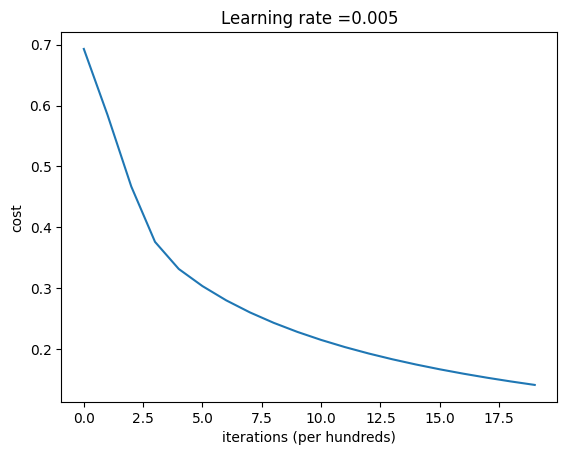

In [59]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

**Interpretation**:
You can see the cost decreasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. Try to increase the number of iterations in the cell above and rerun the cells. You might see that the training set accuracy goes up, but the test set accuracy goes down. This is called overfitting. 

#### Choice of learning rate ####

**Reminder**:
In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$  determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of learning rates. Run the cell below. This should take about 1 minute. Feel free also to try different values than the three we have initialized the `learning_rates` variable to contain, and see what happens. 

Training a model with learning rate: 0.01

-------------------------------------------------------

Training a model with learning rate: 0.001

-------------------------------------------------------

Training a model with learning rate: 0.0001

-------------------------------------------------------



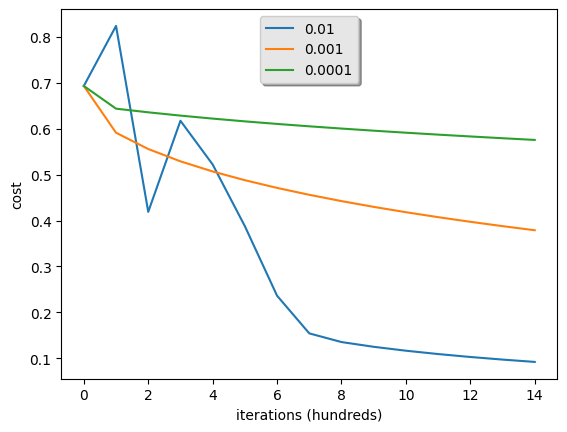

In [60]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Interpretation**: 
- Different learning rates give different costs and thus different predictions results.
- If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost). 
- A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.
- In deep learning, we usually recommend that you: 
    - Choose the learning rate that better minimizes the cost function.
    - If your model overfits, use other techniques to reduce overfitting.

<a name='7'></a>
## 7 - Test with your own image (optional/ungraded exercise) ##

Congratulations on finishing this assignment. You can use your own image and see the output of your model. To do that:

    1. Click on "File" in the upper bar of this notebook, then click "Open" to go on your Coursera Hub.
    2. Add your image to this Jupyter Notebook's directory, in the "images" folder
    3. Change your image's name in the following code
    4. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)!

y = 1.0, your algorithm predicts a "cat" picture.


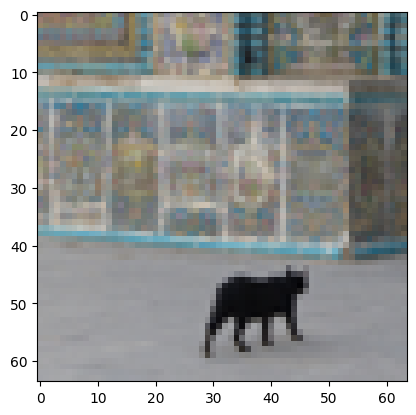

In [68]:
# change this to the name of your image file
my_image = "cat_in_iran.jpg"   

# We preprocess the image to fit your algorithm.
fname = my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")